# Wine Quality Prediction—Classification

## Importing Libraries and Helper Functions

### Libraries

In [1]:
# System
import warnings

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR


### Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

### Helper Functions

#### Text Annotations

In [3]:
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

## Load the Data

In [4]:
data = pd.read_csv('../datasets/raw/white_wine.csv', delimiter=';')

# Display the first 5 rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA: Overveiw

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Feature Engineering

## Data Preprocessing

In [7]:
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### Random Forest

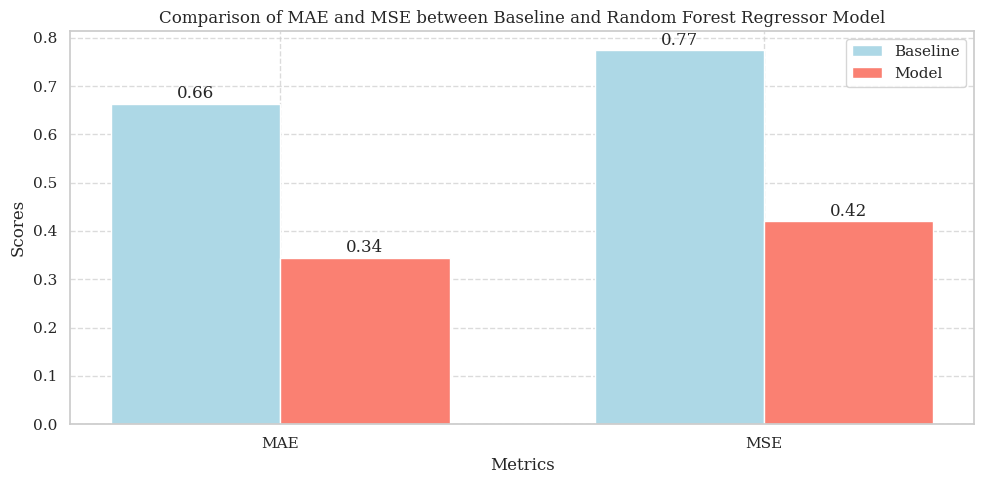

In [8]:
# Initialize Random Forest Regressor model
rfr_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfr_model.fit(X_train, y_train)

# Predict the target values
rfr_y_pred = rfr_model.predict(X_test)

# Calculate the baseline predictions
baseline_pred = np.mean(y_test)

# Calculate MAE and MSE for the baseline model
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))

# Evaluate the model
rfr_mae = mean_absolute_error(y_test, rfr_y_pred)
rfr_mse = mean_squared_error(y_test, rfr_y_pred)

# Plot the MAE and MSE
metrics = ['MAE', 'MSE']
baseline_metrics = [baseline_mae, baseline_mse]
rfr_metrics = [rfr_mae, rfr_mse]

x = np.arange(len(metrics))
width = 0.35

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, baseline_metrics, width, label='Baseline', color='lightblue')
rects2 = ax.bar(x + width/2, rfr_metrics, width, label='Model', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MAE and MSE between Baseline and Random Forest Regressor Model')

# Add xticks
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add legend
ax.legend()

# Add text annotations
add_labels(rects1)
add_labels(rects2)

# Add grid
ax.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### LightGBM

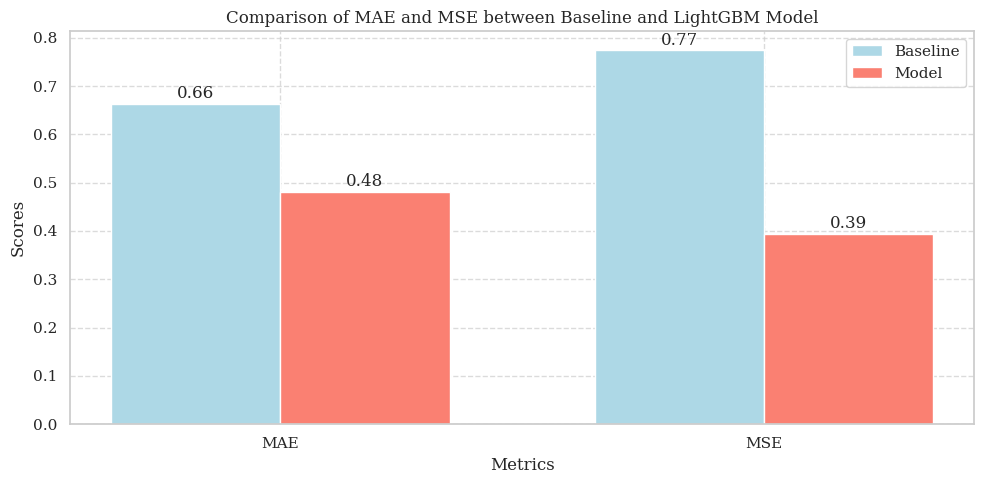

In [9]:
# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor(
    n_estimators=50, 
    random_state=42, 
    force_col_wise=True,
    verbose=-1, 
    learning_rate=0.1, 
    max_depth=20, 
    num_leaves=50)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict the target values
lgb_y_pred = lgb_model.predict(X_test)

# Calculate the baseline predictions
baseline_pred = np.mean(y_test)

# Calculate MAE and MSE for the baseline model
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))

# Evaluate the model
lgb_mae = mean_absolute_error(y_test, lgb_y_pred)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)

# Plot the MAE and MSE
metrics = ['MAE', 'MSE']
baseline_metrics = [baseline_mae, baseline_mse]
lgb_metrics = [lgb_mae, lgb_mse]

x = np.arange(len(metrics))
width = 0.35

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width/2, baseline_metrics, width, label='Baseline', color='lightblue')
rects2 = ax.bar(x + width/2, lgb_metrics, width, label='Model', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MAE and MSE between Baseline and LightGBM Model')

# Add xticks
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add legend
ax.legend()

# Add text annotations
add_labels(rects1)
add_labels(rects2)

# Add grid
ax.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning

In [10]:
# Define the hyperparameters
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'num_leaves': [31, 50, 100]
# }

# Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=lgb_model, 
#     param_grid=param_grid, 
#     cv=5, 
#     n_jobs=-1, 
#     verbose=1, 
#     scoring='neg_mean_absolute_error'
# )

# Train the model
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(f'Best hyperparameters: {best_params}')

#### Model Evaluation

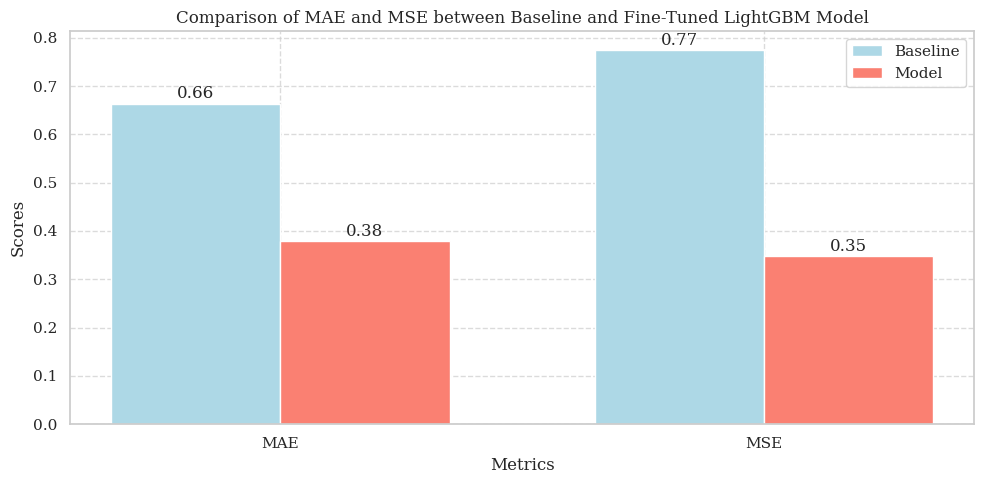

In [11]:
# Best parameters
best_params = {
    "learning_rate": 0.2,
    "max_depth": -1,
    "n_estimators": 200,
    "num_leaves": 100,
    "force_col_wise": True,
}

# Evaluate the model
lgb_fine_tuned_model = lgb.LGBMRegressor(**best_params)
lgb_fine_tuned_model.fit(X_train, y_train)

# Predict the target values
lgb_fine_tuned_y_pred = lgb_fine_tuned_model.predict(X_test)

# Calculate MAE and MSE for the baseline model
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))

# Evaluate the model
lgb_fine_tuned_mae = mean_absolute_error(y_test, lgb_fine_tuned_y_pred)
lgb_fine_tuned_mse = mean_squared_error(y_test, lgb_fine_tuned_y_pred)

# Plot the MAE and MSE
metrics = ['MAE', 'MSE']
baseline_metrics = [baseline_mae, baseline_mse]
lgb_fine_tuned_metrics = [lgb_fine_tuned_mae, lgb_fine_tuned_mse]

x = np.arange(len(metrics))
width = 0.35

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width/2, baseline_metrics, width, label='Baseline', color='lightblue')
rects2 = ax.bar(x + width/2, lgb_fine_tuned_metrics, width, label='Model', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MAE and MSE between Baseline and Fine-Tuned LightGBM Model')

# Add xticks
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add legend
ax.legend()

# Add text annotations
add_labels(rects1)
add_labels(rects2)

# Add grid
ax.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### Support Vector Regression (SVR)

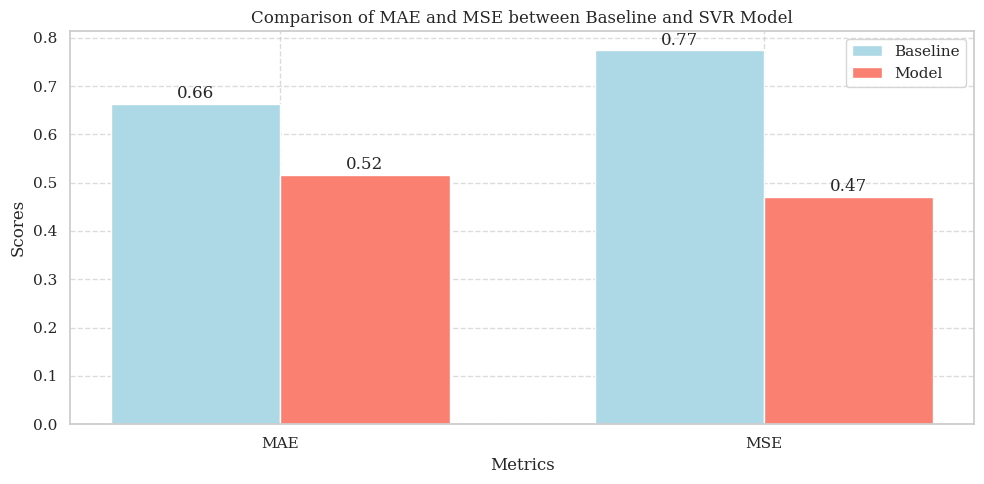

In [12]:
# Initialize SVR model
svm_model = SVR(kernel='rbf')

# Train the model
svm_model.fit(X_train, y_train)

# Predict the target values
svm_y_pred = svm_model.predict(X_test)

# Calculate the baseline predictions
baseline_pred = np.mean(y_test)

# Calculate MAE and MSE for the baseline model
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))

# Evaluate the model
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)

# Plot the MAE and MSE
metrics = ['MAE', 'MSE']
baseline_metrics = [baseline_mae, baseline_mse]
svm_metrics = [svm_mae, svm_mse]

x = np.arange(len(metrics))
width = 0.35

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width/2, baseline_metrics, width, label='Baseline', color='lightblue')
rects2 = ax.bar(x + width/2, svm_metrics, width, label='Model', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MAE and MSE between Baseline and SVR Model')

# Add xticks
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add legend
ax.legend()

# Add text annotations
add_labels(rects1)
add_labels(rects2)

# Add grid
ax.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## Model Comparison

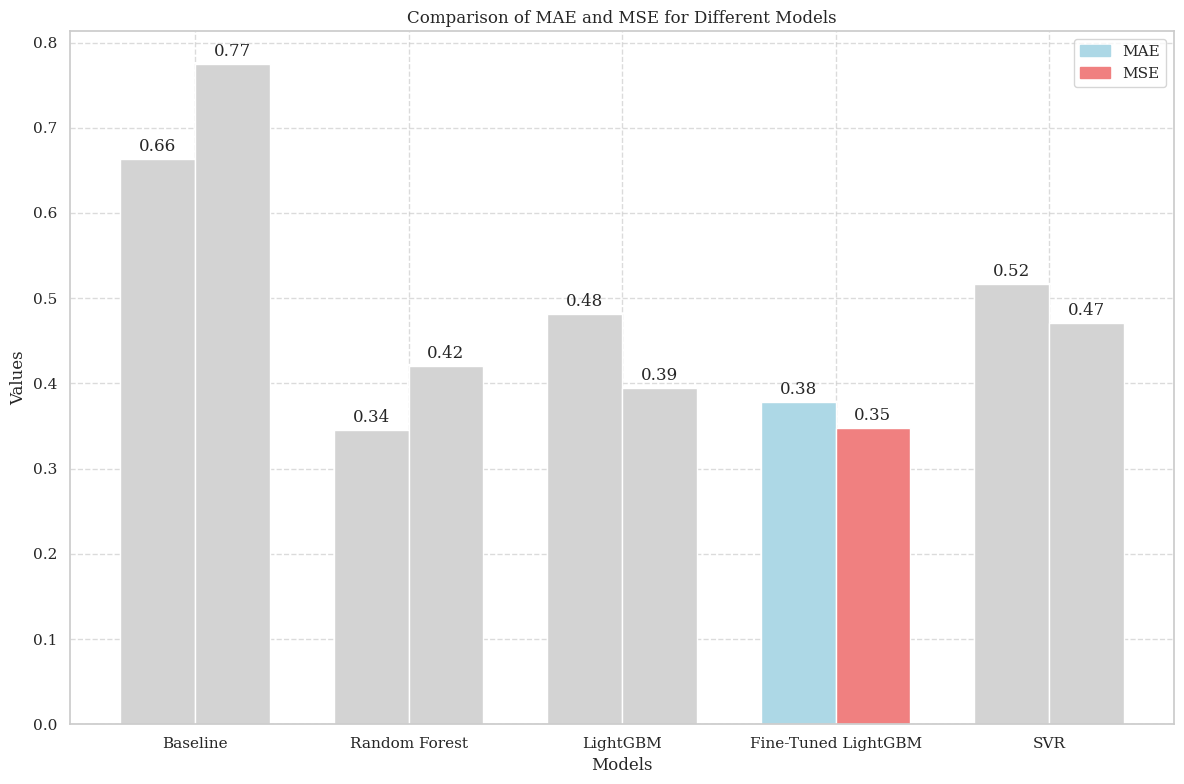

In [13]:
# Values
mae_values = [baseline_mae, rfr_mae, lgb_mae, lgb_fine_tuned_mae, svm_mae]
mse_values = [baseline_mse, rfr_mse, lgb_mse, lgb_fine_tuned_mse, svm_mse]

# Plot the MAE and MSE
models = ['Baseline', 'Random Forest', 'LightGBM', 'Fine-Tuned LightGBM', 'SVR']
x = np.arange(len(models))
width = 0.35

# Identify the best model (lowest combined MAE and MSE)
combined_scores = np.array(mae_values) + np.array(mse_values)
best_model_index = np.argmin(combined_scores)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Colors
highlight_mae_color = 'lightblue'
highlight_mse_color = 'lightcoral'
dull_color = 'lightgray'

# Plot MAE and MSE
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE', color=[highlight_mae_color if i == best_model_index else dull_color for i in range(len(models))])
rects2 = ax.bar(x + width/2, mse_values, width, label='MSE', color=[highlight_mse_color if i == best_model_index else dull_color for i in range(len(models))])

# Set labels and title
ax.set_ylabel('Values')
ax.set_xlabel('Models')
ax.set_title('Comparison of MAE and MSE for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Manually set the legend colors
mae_patch = Patch(color=highlight_mae_color, label='MAE')
mse_patch = Patch(color=highlight_mse_color, label='MSE')
ax.legend(handles=[mae_patch, mse_patch])

# Add text annotations for MAE
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add text annotations for MSE
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add grid
ax.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()